In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("Train_HR_Employee_Attrition.csv")

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1000.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,963.000000,...,1176.000000,606.0,1176.000000,1176.000000,943.000000,1176.000000,1116.000000,1176.000000,1176.000000,1176.000000
mean,37.199000,803.650510,9.210034,2.884354,2.715986,66.299320,2.735544,2.021259,2.702381,6565.946002,...,2.702381,80.0,0.783163,11.019558,2.827147,2.755952,6.926523,4.188776,2.171769,4.107993
std,9.015802,406.683045,8.097024,1.016574,1.088876,20.266116,0.716228,1.069686,1.101578,4710.625603,...,1.092268,0.0,0.851385,7.694848,1.273120,0.707984,6.063193,3.637405,3.189785,3.601097
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,460.500000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2969.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,804.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4969.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1169.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8585.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.027961,0.008081,0.005951,0.026259,0.045007,0.005358,0.040556,-0.056664,0.496275,...,0.028624,NaN,0.033101,0.023891,-0.017973,0.011215,0.330892,0.039994,0.006215,0.012462
DailyRate,-0.027961,1.000000,0.014447,-0.014759,0.047369,0.007709,0.049508,-0.009872,0.044478,-0.030414,...,0.002869,NaN,0.040397,0.015554,-0.018077,-0.046024,-0.016744,0.004506,-0.032954,-0.015054
DistanceFromHome,0.008081,0.014447,1.000000,0.021564,0.000980,0.037306,-0.009932,0.020217,0.004533,0.000690,...,0.013618,NaN,0.072908,0.008690,-0.006520,-0.026830,0.044862,0.014401,0.004995,0.006839
Education,0.005951,-0.014759,0.021564,1.000000,-0.054301,0.007589,0.039782,0.086789,-0.036841,0.008964,...,0.004234,NaN,0.001485,0.140639,-0.006407,0.025790,0.022576,0.053092,0.032377,0.066882
EnvironmentSatisfaction,0.026259,0.047369,0.000980,-0.054301,1.000000,-0.043890,-0.007997,0.036607,-0.015897,-0.053153,...,0.016884,NaN,0.020726,0.030425,-0.008389,0.034762,-0.016126,0.030739,0.036111,0.014774
HourlyRate,0.045007,0.007709,0.037306,0.007589,-0.043890,1.000000,0.032840,-0.043203,-0.088872,-0.014530,...,0.004297,NaN,0.026602,-0.017562,-0.013365,-0.015012,0.007165,-0.027806,-0.038817,-0.025352
JobInvolvement,0.005358,0.049508,-0.009932,0.039782,-0.007997,0.032840,1.000000,-0.022649,-0.025413,0.011389,...,0.054873,NaN,0.042657,-0.022687,-0.023995,-0.026684,-0.028960,0.002518,-0.032253,0.022631
JobLevel,0.040556,-0.009872,0.020217,0.086789,0.036607,-0.043203,-0.022649,1.000000,-0.007627,0.014883,...,-0.009148,NaN,0.003197,0.774492,-0.001041,0.031580,0.014837,0.402092,0.348876,0.391790
JobSatisfaction,-0.056664,0.044478,0.004533,-0.036841,-0.015897,-0.088872,-0.025413,-0.007627,1.000000,0.019431,...,-0.024167,NaN,-0.011700,-0.025719,0.041760,-0.032101,-0.012542,0.002989,-0.034122,-0.032654
MonthlyIncome,0.496275,-0.030414,0.000690,0.008964,-0.053153,-0.014530,0.011389,0.014883,0.019431,1.000000,...,-0.019264,NaN,-0.032897,-0.005489,0.013194,0.027635,0.513209,0.006859,-0.021624,-0.023804


In [10]:
#SCRIPT#
#Normalization MonthlyRate
index_of_positive_MonthlyRate= df.MonthlyRate> 0
positive_MonthlyRate=  df.MonthlyRate.loc[index_of_positive_MonthlyRate]
normalized_MonthlyRate= stats.boxcox(positive_MonthlyRate)[0]
v= pd.DataFrame(normalized_MonthlyRate)
v

,0
0,1638.932745
1,1113.530948
2,1843.162159
3,1973.321704
4,915.510575
...,...
1171,1022.217579
1172,2223.502743
1173,2013.188321
1174,2225.422974


In [38]:
#SCRIPT#
#Normalization DailyRate
index_of_positive_DailyRate= df.DailyRate> 0
positive_DailyRate=  df.DailyRate.loc[index_of_positive_DailyRate]
normalized_DailyRate= stats.boxcox(positive_DailyRate)[0]
t= pd.DataFrame(normalized_DailyRate)
t

,0
0,150.727317
1,257.636317
2,138.603753
3,214.654544
4,282.696749
...,...
1171,242.538250
1172,78.691859
1173,148.826227
1174,250.683152


In [39]:
#SCRIPT#
#Normalization HourlyRate
index_of_positive_HourlyRate= df.HourlyRate> 0
positive_HourlyRate=  df.HourlyRate.loc[index_of_positive_HourlyRate]
normalized_HourlyRate= stats.boxcox(positive_HourlyRate)[0]
z= pd.DataFrame(normalized_HourlyRate)
z

,0
0,52.724618
1,33.189569
2,23.914307
3,40.418011
4,45.835090
...,...
1171,56.890305
1172,46.370842
1173,52.200151
1174,58.439330


C:\Users\claud\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\claud\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([361., 359., 242.,  54.,  32.,  43.,  10.,   5.,   7.,   3.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

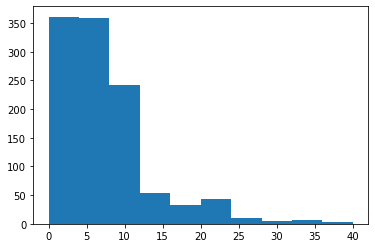

In [36]:
plt.hist(df['YearsAtCompany'])

In [7]:
index_of_positive_YearsAtCompany = df.YearsAtCompany > 0
positive_YearsAtCompany =  df.YearsAtCompany.loc[index_of_positive_YearsAtCompany]
normalized_YearsAtCompany= stats.boxcox(positive_YearsAtCompany)[0]


(array([136.,  97.,  96., 231., 188., 182.,  61.,  68.,  11.,  14.]),
 array([0.        , 0.49347124, 0.98694247, 1.48041371, 1.97388495,
        2.46735619, 2.96082742, 3.45429866, 3.9477699 , 4.44124114,
        4.93471237]),
 <a list of 10 Patch objects>)

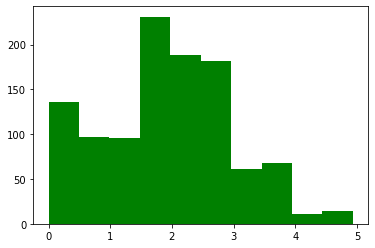

In [11]:
plt.hist(normalized_YearsAtCompany, color='green')

Text(0.5, 1.0, 'normalized_YearsAtCompany')

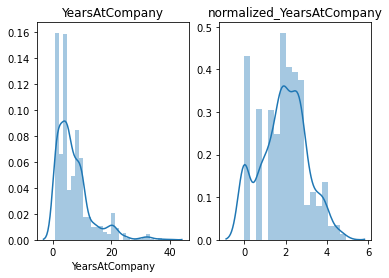

In [26]:
fig, ax=plt.subplots(1,2)
sns.distplot(positive_YearsAtCompany, ax=ax[0])
ax[0].set_title("YearsAtCompany")
sns.distplot(normalized_YearsAtCompany, ax=ax[1])
ax[1].set_title("normalized_YearsAtCompany")

(array([231., 228., 198.,  65.,  76.,  36.,  39.,  10.,  38.,  42.]),
 array([ 1009.,  2908.,  4807.,  6706.,  8605., 10504., 12403., 14302.,
        16201., 18100., 19999.]),
 <a list of 10 Patch objects>)

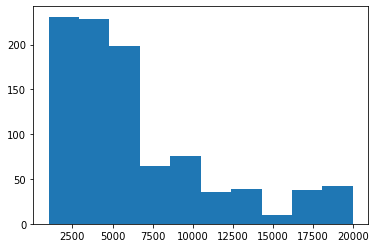

In [12]:
plt.hist(df['MonthlyIncome'])

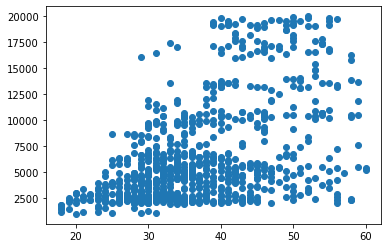

In [14]:
plt.scatter(df['Age'],df['MonthlyIncome'])

In [6]:
#SCRIPT#
#LogTrasfMonthlyIncome
t = np.log(df['MonthlyIncome'])
p= pd.DataFrame(t)
p

,MonthlyIncome
0,9.041448
1,8.483430
2,8.469682
3,7.937017
4,8.984443
...,...
1171,7.656810
1172,8.546169
1173,7.824046
1174,8.385945


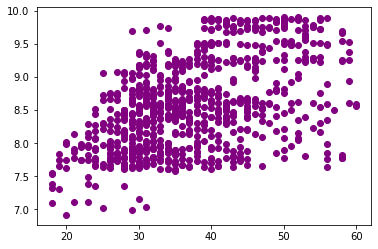

In [16]:
plt.scatter(df['Age'], t, color='purple')

In [35]:
#SCRIPT#
#Discretization variable 'DistanceFromHome'
a = pd.cut(df['DistanceFromHome'], bins=4)
labels=['Near','Intermediate','Proximate', 'Far']
b = pd.DataFrame(a)
b


,DistanceFromHome
0,"(8.0, 15.0]"
1,"(0.972, 8.0]"
2,"(15.0, 22.0]"
3,"(0.972, 8.0]"
4,"(8.0, 15.0]"
...,...
1171,"(15.0, 22.0]"
1172,"(0.972, 8.0]"
1173,"(0.972, 8.0]"
1174,"(0.972, 8.0]"


(array([613., 276., 139., 148.]),
 array([ 1.,  8., 15., 22., 29.]),
 <a list of 4 Patch objects>)

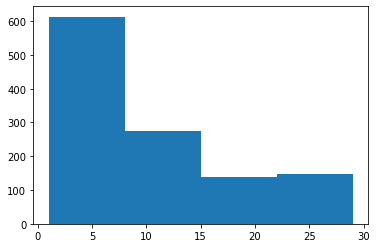

In [38]:
plt.hist(df['DistanceFromHome'], bins=4)

In [42]:
#SCRIPT#
#Discretization variable 'Age'
c = pd.cut(df['Age'], bins=10).value_counts()
d = pd.DataFrame(c)
d


,Age
"(34.8, 39.0]",198
"(30.6, 34.8]",179
"(26.4, 30.6]",160
"(39.0, 43.2]",129
"(43.2, 47.4]",92
"(22.2, 26.4]",63
"(47.4, 51.6]",61
"(51.6, 55.8]",56
"(55.8, 60.0]",31
"(17.958, 22.2]",31


C:\Users\claud\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\claud\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 31.,  63., 160., 179., 168., 159.,  92.,  61.,  56.,  31.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

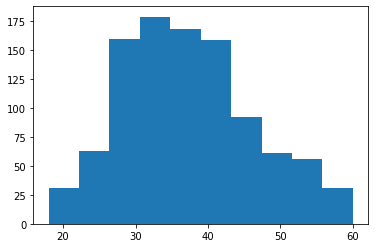

In [36]:
plt.hist(df['Age'], bins=10)

In [18]:
#SCRIPT#
#Binarization categorical variable 'Gender'
df = pd.get_dummies(df['Gender'])
print (df.head())


   Female  Male
0       0     1
1       0     1
2       0     0
3       0     1
4       1     0


In [31]:
#SCRIPT#
#Binarization categorical variable 'Attrition'
df = pd.get_dummies(df['Attrition'])
print (df.head())

   No  Yes
0   1    0
1   1    0
2   1    0
3   1    0
4   1    0
